### Data Inspection & Cleaning

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset
df = sns.load_dataset("titanic")


print("First few rows of the dataset:")
print(df.head())

print("\nDataset structure (info):")
print(df.info())


print("\nSummary statistics (describe):")
print(df.describe(include="all"))


print("\nMissing values per column:")
print(df.isnull().sum())


df["age"] = df["age"].fillna(df["age"].median())
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode().iloc[0])
df["embarked"] = df["embarked"].fillna(df["embarked"].mode().iloc[0])
df["fare"] = df["fare"].fillna(df["fare"].median())

df = df.drop(columns=["deck"])


df = df.drop(columns=["embarked", "alive"])


print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


df = pd.get_dummies(df, columns=["sex", "embark_town", "class", "who", "alone"], drop_first=True)


df["fare"] = df["fare"].apply(lambda x: np.log1p(x))


cols = ["survived"] + [col for col in df.columns if col != "survived"]
df = df[cols]

print("\nCleaned Dataset Info:")
print(df.info())

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset structure (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------  

### Summary Statistics & Initial Insights

In [26]:



df = sns.load_dataset("titanic")


print("First few rows of the dataset:")
print(df.head())


print("\nDataset structure (info):")
print(df.info())


print("\nSummary statistics (describe):")
print(df.describe(include="all"))


print("\nMissing values per column:")
print(df.isnull().sum())

df["age"] = df["age"].fillna(df["age"].median())
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode().iloc[0])
df["embarked"] = df["embarked"].fillna(df["embarked"].mode().iloc[0])
df["fare"] = df["fare"].fillna(df["fare"].median())

df = df.drop(columns=["deck"])


df = df.drop(columns=["embarked", "alive"])


print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


df = pd.get_dummies(df, columns=["sex", "embark_town", "class", "who", "alone"], drop_first=True)

df["fare"] = df["fare"].apply(lambda x: np.log1p(x))
cols = ["survived"] + [col for col in df.columns if col != "survived"]
df = df[cols]

print("\nCleaned Dataset Info:")
print(df.info())

print("\nBasic Summary Statistics:")
print(df.describe().T[["mean", "50%", "std"]].rename(columns={"50%": "median"}))


print("\nCorrelation Matrix:")
print(df.corr())

avg_age_survivors = df[df["survived"] == 1]["age"].mean()
avg_age_non_survivors = df[df["survived"] == 0]["age"].mean()
print(f"\nAverage Age of Survivors: {avg_age_survivors:.2f}")
print(f"Average Age of Non-Survivors: {avg_age_non_survivors:.2f}")


survival_rate = df["survived"].mean() * 100
print(f"\nPercentage of Passengers Survived: {survival_rate:.2f}%")

survival_rate_gender = df.groupby("sex_male")["survived"].mean() * 100
print("\nSurvival Rate by Gender:")
for index, value in survival_rate_gender.items():
    gender = "Female" if index == 0 else "Male"
    print(f"{gender}: {value:.2f}%")


survival_rate_class = df.groupby("pclass")["survived"].mean() * 100
print("\nSurvival Rate by Passenger Class:")
print(f"First Class: {survival_rate_class.loc[1]:.2f}%")
print(f"Second Class: {survival_rate_class.loc[2]:.2f}%")
print(f"Third Class: {survival_rate_class.loc[3]:.2f}%")


First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset structure (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------  

### Data Visualization

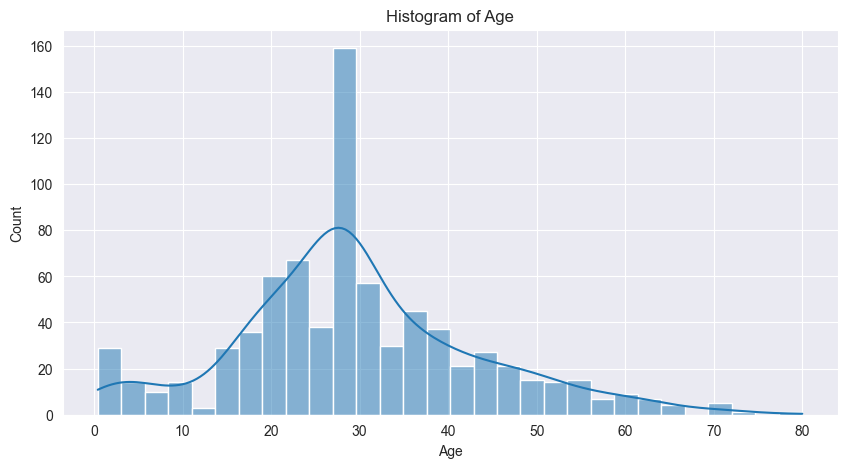

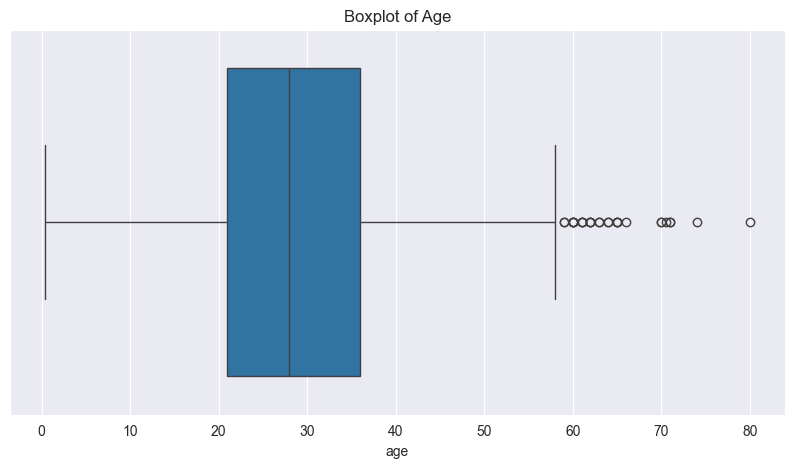

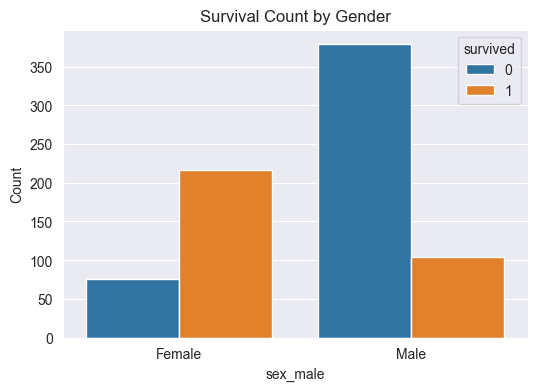

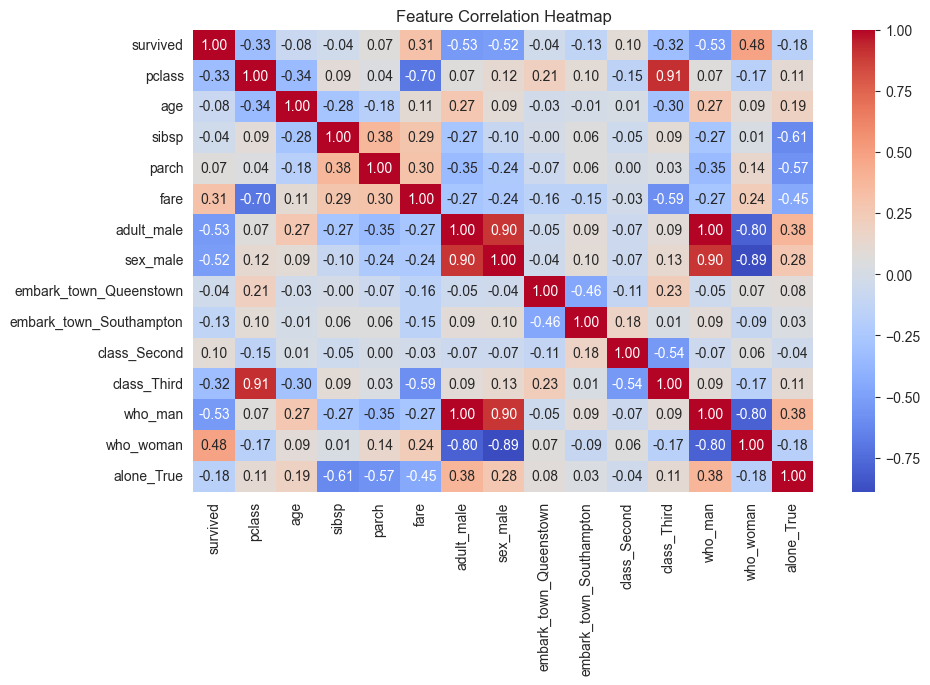

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex_male", hue="survived")
plt.xticks([0, 1], ["Female", "Male"])
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()